## Matplotlib Style

Who doesn't like feel and [colors](http://colorbrewer2.org/) of [ggplot](http://ggplot2.org/)?

<img src='https://s3.amazonaws.com/research_computing_tutorials/ggplot.png'>



How do we make matplotlib look like this?

Useful exercise (even if you don't appreciate this).
References:

- [Painless create beautiful matplotlib](http://blog.olgabotvinnik.com/post/58941062205/prettyplotlib-painlessly-create-beautiful-matplotlib)
- [Making matplotlib look like ggplot](http://messymind.net/2012/07/making-matplotlib-look-like-ggplot/)

### The `scatter` plot

In [4]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
cars = pd.read_csv(os.path.join('data','cars.csv'))
cars.head()

,type,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,MazdaRX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
1,MazdaRX4Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
2,Datsun710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
3,Hornet4Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
4,HornetSportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


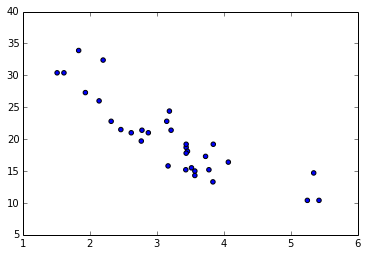

In [6]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(cars['wt'], cars['mpg'])
fig.show()

### Changing style

Check out [color brewer](http://colorbrewer2.org/) and [brewer2mpl wiki](https://github.com/jiffyclub/brewer2mpl/wiki)

In [9]:
%%bash
pip install brewer2mpl

Cleaning up...


In [10]:
import brewer2mpl

color = brewer2mpl.get_map('Set2', 'qualitative', 3).mpl_colors

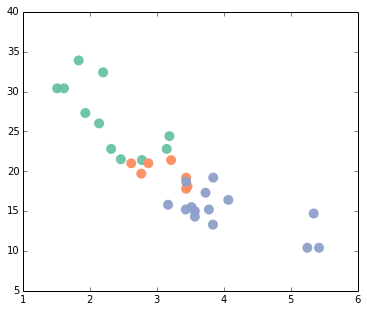

In [11]:
fig, ax = plt.subplots(figsize=(6,5))
for i, cyl in enumerate([4,6,8]):
    df = cars[cars['cyl'] == cyl]
    ax = plt.scatter(df['wt'], df['mpg'], s=100, alpha=0.95, edgecolor='none', c=color[i])
fig.show()

### The beauty of `objects`

In [12]:
def base_figure():
    fig, ax = plt.subplots(figsize=(6,5))
    for index, cyl in enumerate([4,6,8]):
        df = cars[cars['cyl'] == cyl]
        ax.scatter(df['wt'], df['mpg'], c=color[index], s=100, alpha=0.75, edgecolor='none')
    return fig, ax

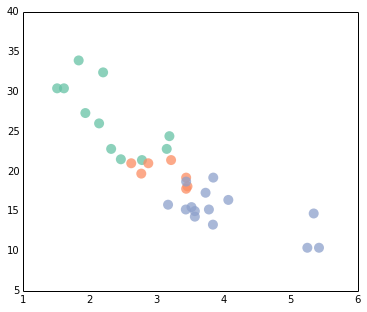

In [13]:
fig, ax = base_figure()

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')  

fig.show()

In [14]:
def remove_ticks(ax):
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
def remove_splines(ax, spl):
    for s in spl:
        ax.spines[s].set_visible(False)  

def modify_splines(ax, lwd, col):    
    for s in ['bottom', 'left','top','right']:
        ax.spines[s].set_linewidth(lwd)
        ax.spines[s].set_color(col)    
           

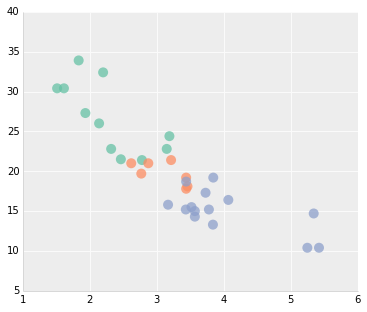

In [15]:
fig, ax = base_figure()

remove_ticks(ax)
modify_splines(ax, lwd=0.75, col='0.8')
remove_splines(ax, ['top','right'])

ax.patch.set_facecolor('0.93')
ax.grid(True, 'major', color='0.98', linestyle='-', linewidth=1.0)
ax.set_axisbelow(True)   

fig.show()

### Define custom transformations

In [16]:
def ggplot(ax):
    
    remove_ticks(ax)
    modify_splines(ax, lwd=0.75, col='0.8')
    remove_splines(ax, ['top','right'])
    
    ax.patch.set_facecolor('0.93')
    ax.grid(True, 'major', color='0.98', linestyle='-', linewidth=1.0)
    ax.set_axisbelow(True)   

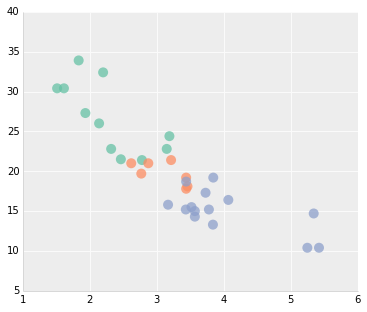

In [17]:
fig, ax = base_figure()
ggplot(ax)
fig.show()

### Legends

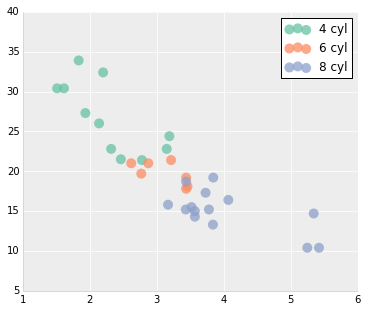

In [18]:
def base_figure():
    
    fig, ax = plt.subplots(figsize=(6,5))
    for index, cyl in enumerate([4,6,8]):
        df = cars[cars['cyl'] == cyl]
        ax.scatter(df['wt'], 
                   df['mpg'], 
                   c=color[index], 
                   s=100, 
                   alpha=0.75, 
                   edgecolor='none',
                   label='{0} cyl'.format(cyl))  # adding a label
    
    return fig, ax

fig, ax = base_figure()

ax.legend(loc='best')

ggplot(ax)

fig.show()

In [19]:
def nice_legend(ax):
    if ax.legend_ is not None:
        ax.legend_.get_frame().set_linewidth(0)
        ax.legend_.get_frame().set_alpha(0.5)

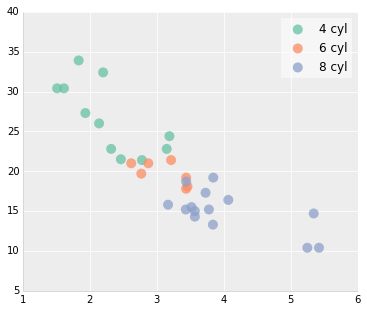

In [20]:
fig, ax = base_figure()

ax.legend(loc='best', scatterpoints=1) # for a single point

ggplot(ax)
nice_legend(ax)

fig.show()        

### Changing your default style

You can add *some* custom styles in your `~/.matplotlib/matplotlibrc` file.

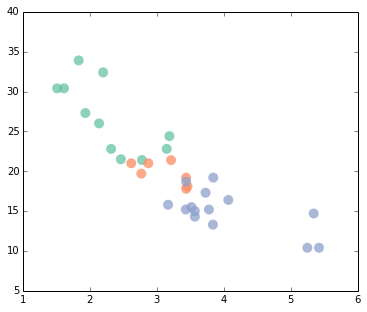

In [21]:
fig, ax = base_figure()
fig.show()

### Setting the `mpl.rcParams`

The default figue size.

In [22]:
mpl.rcParams['figure.figsize'] = 8, 4

Change the axes background color, turn on grid lines, change the color.

In [23]:
mpl.rcParams['axes.facecolor'] = '0.93'
mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.linestyle'] = '-'
mpl.rcParams['grid.linewidth'] = 1
mpl.rcParams['grid.color'] = '1.0' 
mpl.rcParams['axes.axisbelow'] = True
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['axes.edgecolor'] = '0.7' #can't remove some
mpl.rcParams['xtick.major.size'] = 0.0
mpl.rcParams['ytick.major.size'] = 0.0

Modify the legend.

In [24]:
mpl.rcParams['legend.fancybox'] = True
mpl.rcParams['legend.scatterpoints'] = 1
mpl.rcParams['legend.frameon'] = False

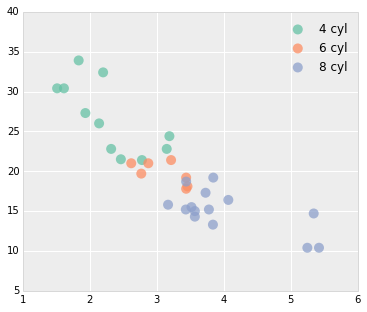

In [25]:
fig, ax = base_figure()
ax.legend(loc='best')
fig.show()

And many more options....

In [26]:
mpl.rcParams.keys()[:10]

['agg.path.chunksize',
 'animation.avconv_args',
 'animation.avconv_path',
 'animation.bitrate',
 'animation.codec',
 'animation.convert_args',
 'animation.convert_path',
 'animation.ffmpeg_args',
 'animation.ffmpeg_path',
 'animation.frame_format']

Let's save that for later...

In [27]:
import json

with open('mplrc.json','w') as output:
    output.write(json.dumps(mpl.rcParams))

### Tricks with `itertools` and `functools`

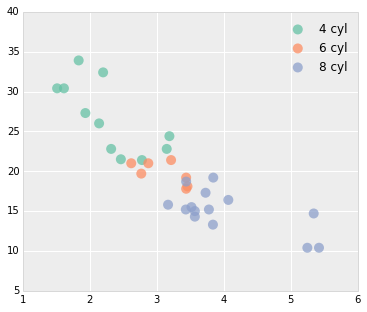

In [28]:
fig, ax = plt.subplots(figsize=(6,5))

for index, cyl in enumerate([4,6,8]):
    df = cars[cars['cyl'] == cyl]
    ax.scatter(df['wt'], 
               df['mpg'], 
               c=color[index], 
               s=100, 
               alpha=0.75, 
               edgecolor='none',
               label='{0} cyl'.format(cyl))  # adding a label
    
ax.legend(loc='best')
fig.show()

In [29]:
import itertools
from functools import partial

In [30]:
color_iter = itertools.cycle(color)
partial_scatter = partial(plt.scatter, s=100, alpha=0.75, edgecolor='none')

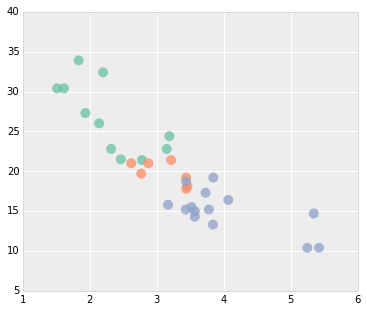

In [31]:
fig, ax = plt.subplots(figsize=(6,5))
for cyl in [4,6,8]:
    df = cars[cars['cyl'] == cyl]
    
    ax = partial_scatter(df['wt'], df['mpg'], c=next(color_iter), label='{0} cyl'.format(cyl))

fig.show()

### How about as a `d3` svg?

https://github.com/jakevdp/mpld3

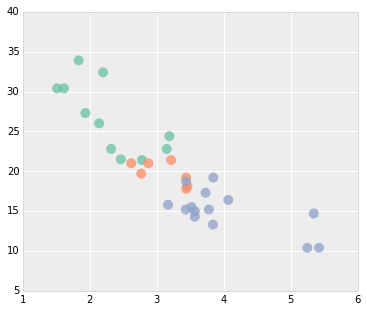

In [32]:
from mpld3 import enable_notebook
enable_notebook()

fig, ax = base_figure()
#ax.legend(loc='best')  # Note quite yet
fig.show()